#  Statistical Analysis


## 1 - Descriptive Statistics

In [27]:
# Descriptive Statistics for the Score columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/StudentsPerformance.csv"
df = pd.read_csv(path)
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


## 2 - Identify and Handle Outliers

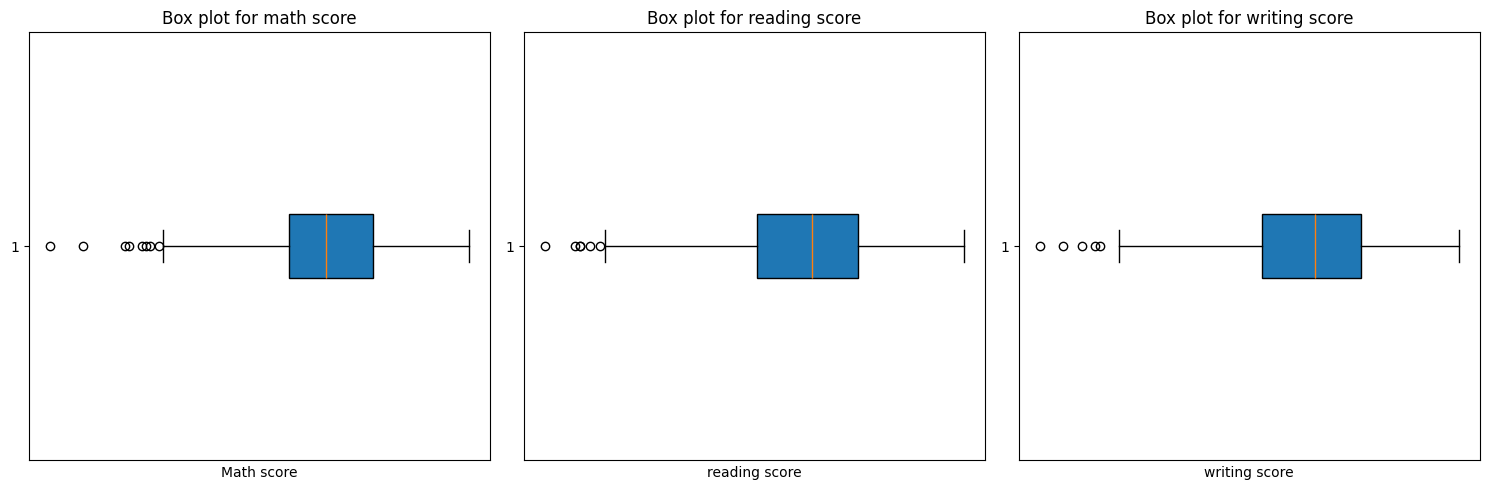

In [3]:
# 1 - box plots for math, read and write score

plt.figure(figsize = (15, 5))

# Math Score
plt.subplot(1, 3, 1)
plt.boxplot(df["math score"], vert = False, patch_artist= True)
plt.title("Box plot for math score")
plt.xlabel("Math score")
plt.xticks([])

# reading Score
plt.subplot(1, 3, 2)
plt.boxplot(df["reading score"], vert = False, patch_artist= True)
plt.title("Box plot for reading score")
plt.xlabel("reading score")
plt.xticks([])

# writing Score
plt.subplot(1, 3, 3)
plt.boxplot(df["writing score"], vert = False, patch_artist= True)
plt.title("Box plot for writing score")
plt.xlabel("writing score")
plt.xticks([])

plt.tight_layout(rect = [0, 0, 1, 1])
plt.show()

In [4]:
# Identify and Handle Outliers:
score_columns = ["math score", "reading score", "writing score"]
df_1 = df.copy()
IQR_values = []
upper_bounds = []
lower_bounds = []

for i in score_columns:
  # 2 - IQR values for each columns
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  IQR = q3 - q1
  IQR_values.append(IQR)

  # 3 - Upper Boound and Lower Bound
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR
  lower_bounds.append(lower_bound)
  upper_bounds.append(upper_bound)

  print(f"{i}:")
  print(f"- IQR value : {IQR}")
  print(f"- Lower Bound : {lower_bound}")
  print(f"- Upper Bound : {upper_bound}")

  # 4 - Removed Outliers
  df_1 =  df_1[(df_1[i] >= lower_bound) & (df_1[i] <= upper_bound)]
  print("\n")

print(df_1.describe())


math score:
- IQR value : 20.0
- Lower Bound : 27.0
- Upper Bound : 107.0


reading score:
- IQR value : 20.0
- Lower Bound : 29.0
- Upper Bound : 109.0


writing score:
- IQR value : 21.25
- Lower Bound : 25.875
- Upper Bound : 110.875


       math score  reading score  writing score
count  988.000000     988.000000     988.000000
mean    66.625506      69.640688      68.566802
std     14.409394      14.016760      14.525267
min     27.000000      29.000000      27.000000
25%     57.000000      60.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      80.000000      79.000000
max    100.000000     100.000000     100.000000


## 3 - Check Distribution and Skewness:

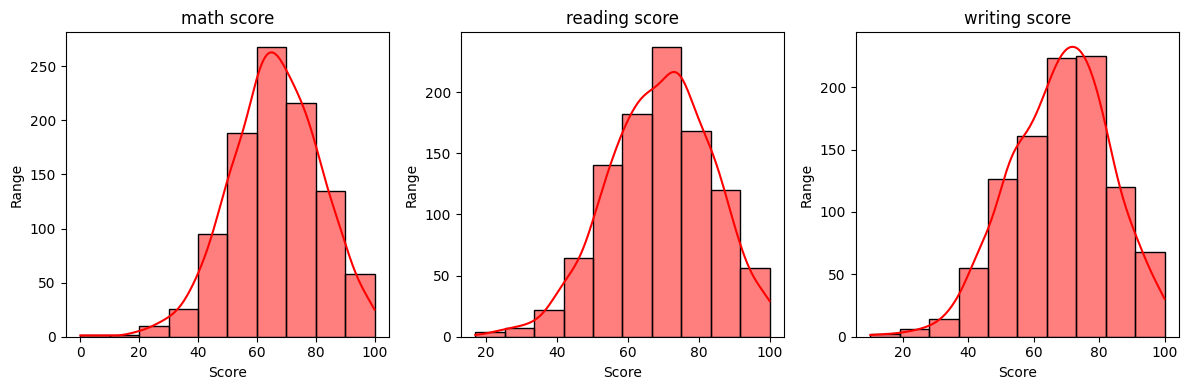

In [5]:
# 3.1 - Plot histogram for visual representation
plt.figure(figsize = (12, 4))
score_columns = ["math score", "reading score", "writing score"]

for i, column in enumerate(score_columns, 1):
  plt.subplot(1, 3, i)
  sns.histplot(df[column], kde = True, bins = 10, color = "red")
  plt.title(column)
  plt.xlabel("Score")
  plt.ylabel("Range")

plt.tight_layout(rect = [0, 0, 1, 1])
plt.show()

In [6]:
# 3.2 - Skewness for each column
for i in score_columns:
  skewness = df_1[i].skew()
  if skewness > 1:
    print(f"{i} - {skewness:.2f} - Right Skewed")
  else:
    print(f"{i} - {skewness:.2f} - Left Skewed")

math score - -0.04 - Left Skewed
reading score - -0.11 - Left Skewed
writing score - -0.11 - Left Skewed


In [7]:
# 3.3 - Transformation based on skewness
for i in score_columns:
  df_1[i] = np.sqrt(df[i])
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


## 4 - Hypotheses Testing

### 4.1 - Formulate Hypotheses

In [ ]:
# Null Hypothesis (H₀) = There is no difference in 'math score' between students completed the 'Test Preperation Course' and those who did not.
# ---------- (H₀) : μ_course = 	μ_nocourse ------------------

# Alternative hypotheses (H₁) = there is no difference between them.
# ---------- (H₁) : μ_course != μ_nocourse ------------------

# we confirmed this is a "Two Tailed Test"

### 4.2 - Significance Level

In [ ]:
alpha = 0.05
#5% chance to reject (H₀) when it is actually True.

### 4.3 - t-test Test Statistic & p-value

In [36]:
# Two group are Course Completed and Incompleted
completed = df[df["test preparation course"] == "completed"]["math score"]
incompleted = df[df["test preparation course"] == "none"]["math score"]

# Calculates the Statistics
from scipy import stats
t_statistics, p_value = stats.ttest_ind(completed, incompleted)

print(f"t-statistics: {t_statistics}")
print(f"p-value: {p_value}")

t-statistics: 5.704616417349102
p-value: 1.5359134607147415e-08


### 4.4 - Decision

In [ ]:
# There is no significance different
# alpha value = 0.05
# P_value = 1.5359134607147415e-08
# now we conclude the result is 0.05 < 1.5359134607147415e-08
# failed to reject the Null Hypotheses
# the course does not affect the students.